In [1]:
from tensorflow.keras.models import load_model
os.environ['KERAS_BACKEND']='tensorflow'
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.layers import add, Activation, LSTM, Conv1D, InputSpec, Input
from tensorflow.keras.layers import MaxPooling1D, SpatialDropout1D, Bidirectional, BatchNormalization, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

In [2]:
# Create a resnet-type deep network for regression similar to EQTransformer
# Start with 7 conv1d and maxpooling layers
# then 7 residual blocks consisting of
#    2 sets of batch normalization, activation, spatial dropout and conv1d

def make_resblock(layer, filters=64, kernel_size=11, activation="relu", rate=0.1):
    x = BatchNormalization()(layer)
    x = Activation(activation)(x)
    x = SpatialDropout1D(rate=rate)(x)
    x = Conv1D(filters,kernel_size, padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation(activation)(x)
    x = SpatialDropout1D(rate=rate)(x)
    x = Conv1D(filters,kernel_size,padding="same")(x)

    return x



In [3]:
kernel_size = 11

In [14]:
input = Input((6000,1))

def make_resnet(input_shape, ):
    first = True

    # first conv layers
    for nfilters in [8, 16,16,32,32,64,64]:
        if first:
            first = False
            x = Conv1D(filters=nfilters, kernel_size=kernel_size, padding="same")(input)
            x = MaxPooling1D()(x)
        else:
            x = Conv1D(filters=nfilters, kernel_size=kernel_size, padding="same")(x)
            x = MaxPooling1D()(x)

    # add residual blocks
    for i in range(7):
        resid = make_resblock(x)
        x = add([x, resid])

    x = Flatten()(x)
    x = Dense(128, activation="relu")(x)
    x = Dense(1, activation="sigmoid")(x)

    return Model(input,x)

In [17]:
model = make_resnet((6000,1))

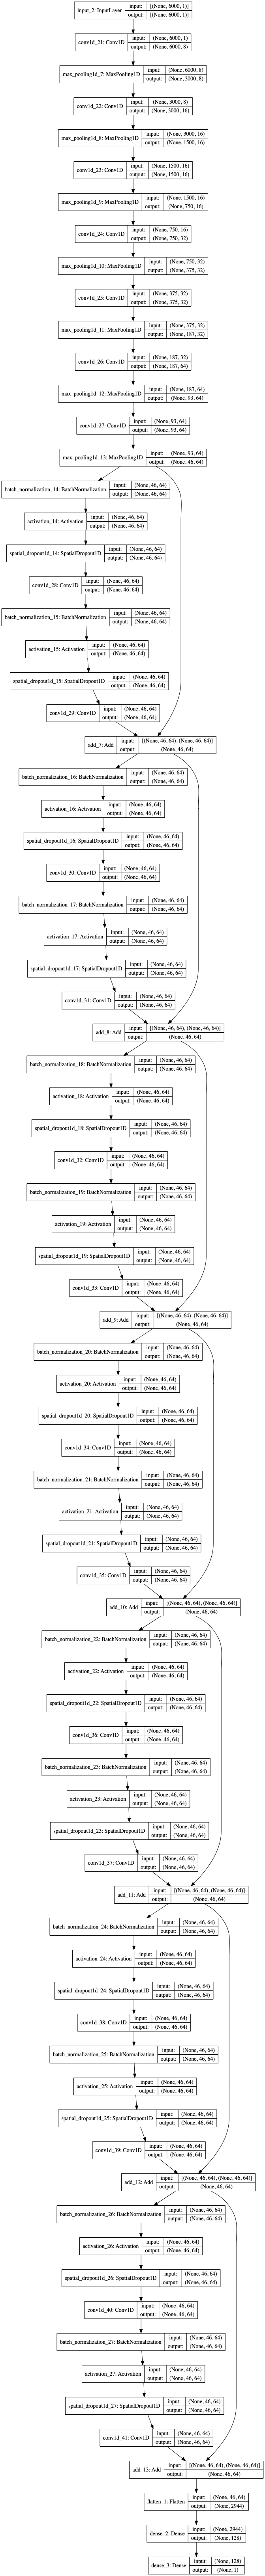

In [16]:
plot_model(model, show_shapes=True,dpi=72)


In [6]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 6000, 1)]    0                                            
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 6000, 8)      96          input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling1d (MaxPooling1D)    (None, 3000, 8)      0           conv1d[0][0]                     
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 3000, 16)     1424        max_pooling1d[0][0]              
______________________________________________________________________________________________

In [7]:
model.compile(loss=Adam)

In [10]:
model()

NameError: name 'ballz' is not defined

In [18]:
drywaves= np.load("../data/processed/dry_waves.npy")

NameError: name 'np' is not defined

In [21]:
import numpy as np
import pandas as pd

In [20]:
drywaves= np.load("../data/processed/dry_waves.npy")

In [24]:
mech_data = pd.read_csv("../data/processed/dry_events_with_mechdata.csv")
mech_data.head()

,Unnamed: 0,seconds,event_ID,event_ID_orig,t_def,Disp_mm,Sig_diff_MPa,Strain_ax,Temp,events_cumulative
0,51,83176.0,2020.009.623857.225537977,225537977,83176,1.50696,7.6197,0.000184,78.2065,0
1,146,83271.0,2020.009.624033.225633151,225633151,83271,1.53385,10.2866,0.000533,78.1337,1
2,167,83292.0,2020.009.624053.225653637,225653637,83292,1.53809,11.0485,0.000588,78.1701,2
3,292,83417.0,2020.009.624259.225779480,225779480,83417,1.56922,14.8584,0.000992,78.1701,3
4,300,83425.0,2020.009.624307.225787413,225787413,83425,1.57205,15.2394,0.001029,78.2065,4


In [25]:
dry_stress = mech_data["Sig_diff_MPa"].values
dry_strain = mech_data["Strain_ax"].values

np.save("../data/processed/dry_stress.npy", dry_stress)
np.save("../data/processed/dry_strain.npy", dry_strain)

In [26]:
drywaves

array([[ 7.79871633, 12.55864501, 15.78395974, ...,  8.48842245,
         5.5958052 ,  2.06952587],
       [ 7.79871633, 12.55864501, 15.78395974, ...,  8.48842245,
         5.5958052 ,  2.06952587],
       [ 7.79871633, 12.55864501, 15.78395974, ...,  8.48842245,
         5.5958052 ,  2.06952587],
       ...,
       [ 7.79871633, 12.55864501, 15.78395974, ...,  8.48842245,
         5.5958052 ,  2.06952587],
       [ 7.79871633, 12.55864501, 15.78395974, ...,  8.48842245,
         5.5958052 ,  2.06952587],
       [ 7.79871633, 12.55864501, 15.78395974, ...,  8.48842245,
         5.5958052 ,  2.06952587]])